In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1=pd.read_csv('ENB2012_data.csv')

In [4]:
df_1.shape

(768, 10)

In [5]:
df_1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

Interpolation Between Random Rows

You can create new rows as weighted averages of existing rows:

In [6]:
n_new = 2000 - len(df_1)
rows = []

for _ in range(n_new):
    i, j = np.random.choice(len(df_1), 2, replace=False)
    alpha = np.random.rand()
    new_row = alpha * df_1.iloc[i] + (1 - alpha) * df_1.iloc[j]
    rows.append(new_row)

df_interpolated = pd.DataFrame(rows, columns=df_1.columns)
df_upsampled = pd.concat([df_1, df_interpolated], ignore_index=True)

print(df_upsampled.shape)


(2000, 10)


In [7]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   X7      2000 non-null   float64
 7   X8      2000 non-null   float64
 8   Y1      2000 non-null   float64
 9   Y2      2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [8]:
df_upsampled.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [9]:
df_upsampled.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [10]:
df_upsampled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.764525,671.470753,317.804142,176.833305,5.237454,3.511454,0.234095,2.776245,22.180472,24.459291
std,0.094651,78.728226,38.840179,40.441552,1.565697,0.995924,0.119193,1.383026,8.973426,8.464894
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,612.500000,294.000000,146.652535,3.500000,2.830960,0.103390,1.836025,14.330000,16.607500
50%,0.752212,674.499191,318.500000,177.849561,5.239581,3.553262,0.250000,2.947537,20.974384,23.619720
75%,0.824312,735.000000,343.000000,220.500000,7.000000,4.223996,0.345506,4.000000,29.352500,31.297950
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [11]:
df_upsampled.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [12]:
df_upsampled.duplicated().sum()

0

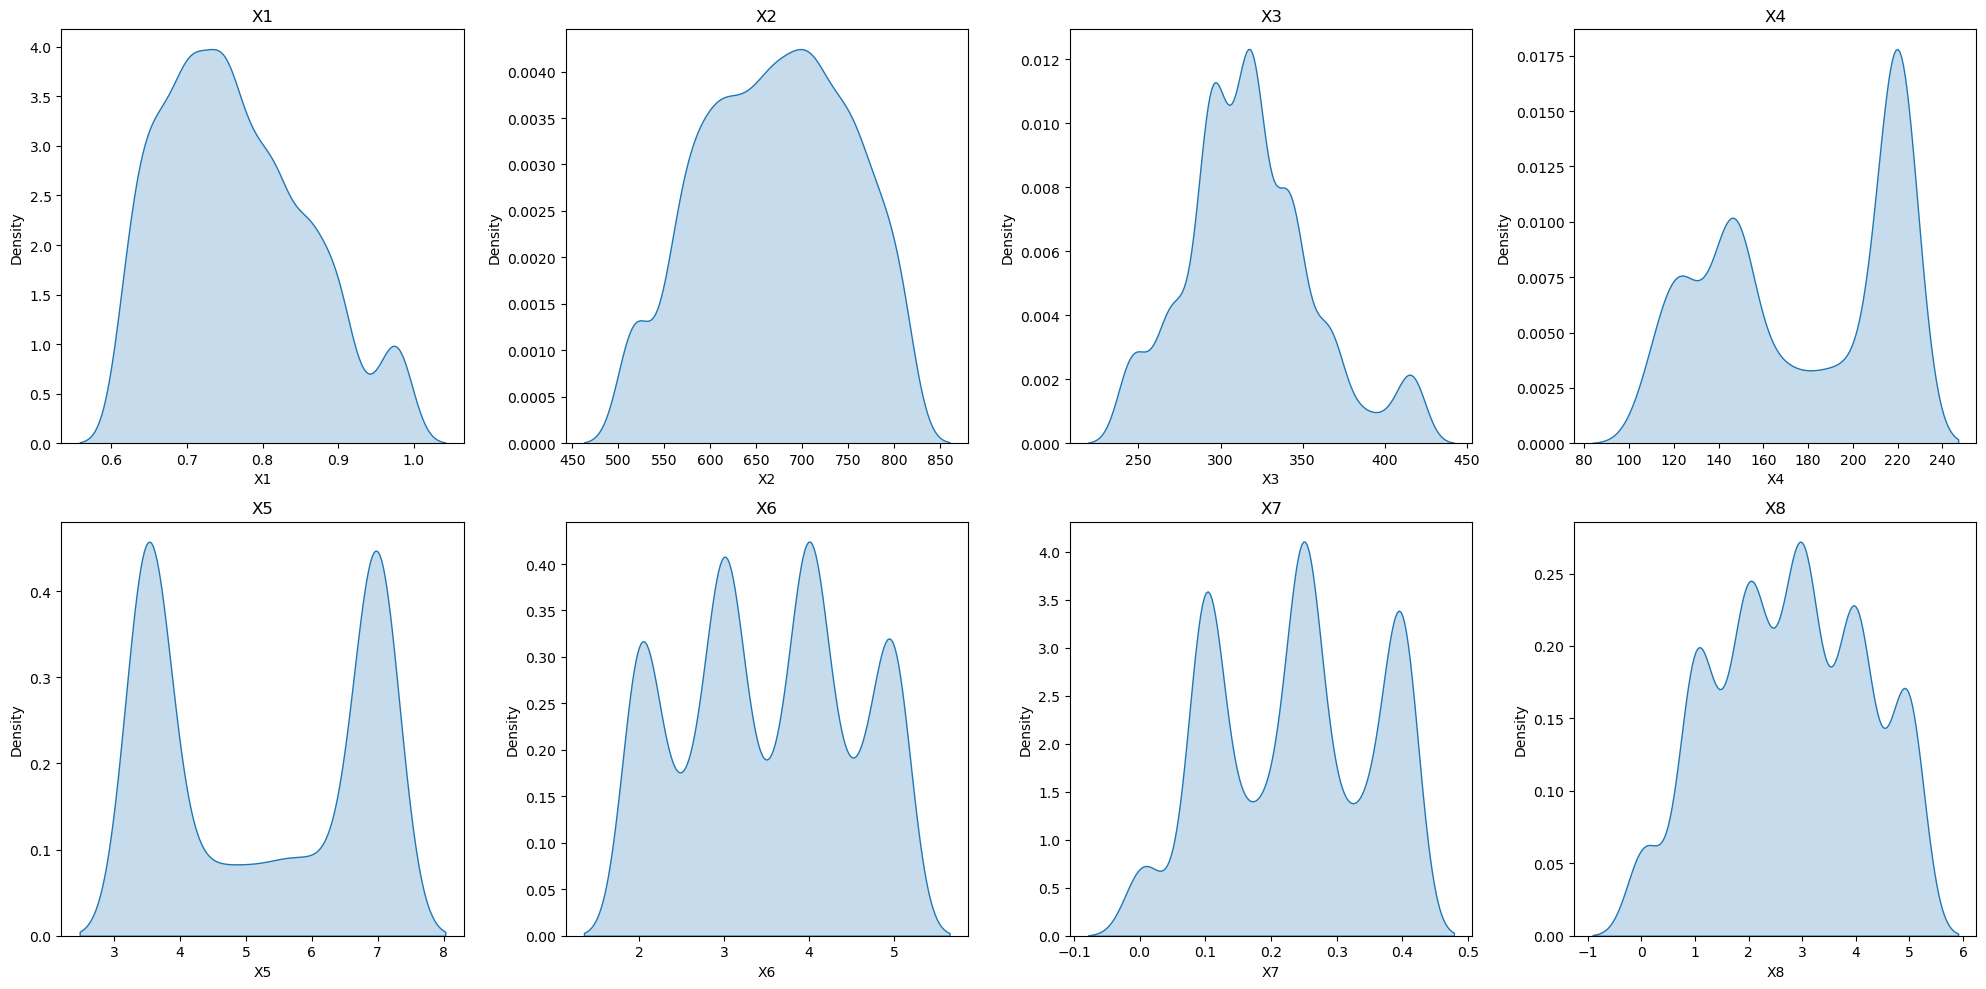

In [13]:
plt.figure(figsize=(20,10))

for i, col in enumerate(['X1','X2','X3','X4','X5','X6','X7','X8'], 1):
    plt.subplot(2,4,i)
    sns.kdeplot(df_upsampled[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [14]:
df_upsampled.skew()

X1    0.480158
X2   -0.122468
X3    0.504083
X4   -0.168358
X5    0.012635
X6   -0.031875
X7   -0.091638
X8   -0.069423
Y1    0.340511
Y2    0.388066
dtype: float64

In [15]:
df_upsampled['X1']=np.log(df_upsampled['X1'])
df_upsampled['X3']=np.log1p(df_upsampled['X3'])

In [16]:
df_upsampled.skew()

X1    0.263166
X2   -0.122468
X3    0.138137
X4   -0.168358
X5    0.012635
X6   -0.031875
X7   -0.091638
X8   -0.069423
Y1    0.340511
Y2    0.388066
dtype: float64

In [17]:
df_upsampled.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.997120,-0.190746,-0.873780,0.840876,-0.021065,-0.000168,0.009779,0.639625,0.653468
X2,-0.997120,1.000000,0.181405,0.881912,-0.859321,0.019750,0.001037,-0.009830,-0.660994,-0.676501
X3,-0.190746,0.181405,1.000000,-0.301878,0.294934,0.011110,-0.001949,-0.020398,0.459775,0.436015
X4,-0.873780,0.881912,-0.301878,1.000000,-0.972505,0.014155,0.002693,0.000681,-0.861159,-0.863875
X5,0.840876,-0.859321,0.294934,-0.972505,1.000000,-0.009964,-0.000740,0.006993,0.888527,0.895749
X6,-0.021065,0.019750,0.011110,0.014155,-0.009964,1.000000,-0.013448,-0.001441,-0.014533,0.001999
X7,-0.000168,0.001037,-0.001949,0.002693,-0.000740,-0.013448,1.000000,0.235258,0.272933,0.206055
X8,0.009779,-0.009830,-0.020398,0.000681,0.006993,-0.001441,0.235258,1.000000,0.105262,0.063846
Y1,0.639625,-0.660994,0.459775,-0.861159,0.888527,-0.014533,0.272933,0.105262,1.000000,0.975636
Y2,0.653468,-0.676501,0.436015,-0.863875,0.895749,0.001999,0.206055,0.063846,0.975636,1.000000


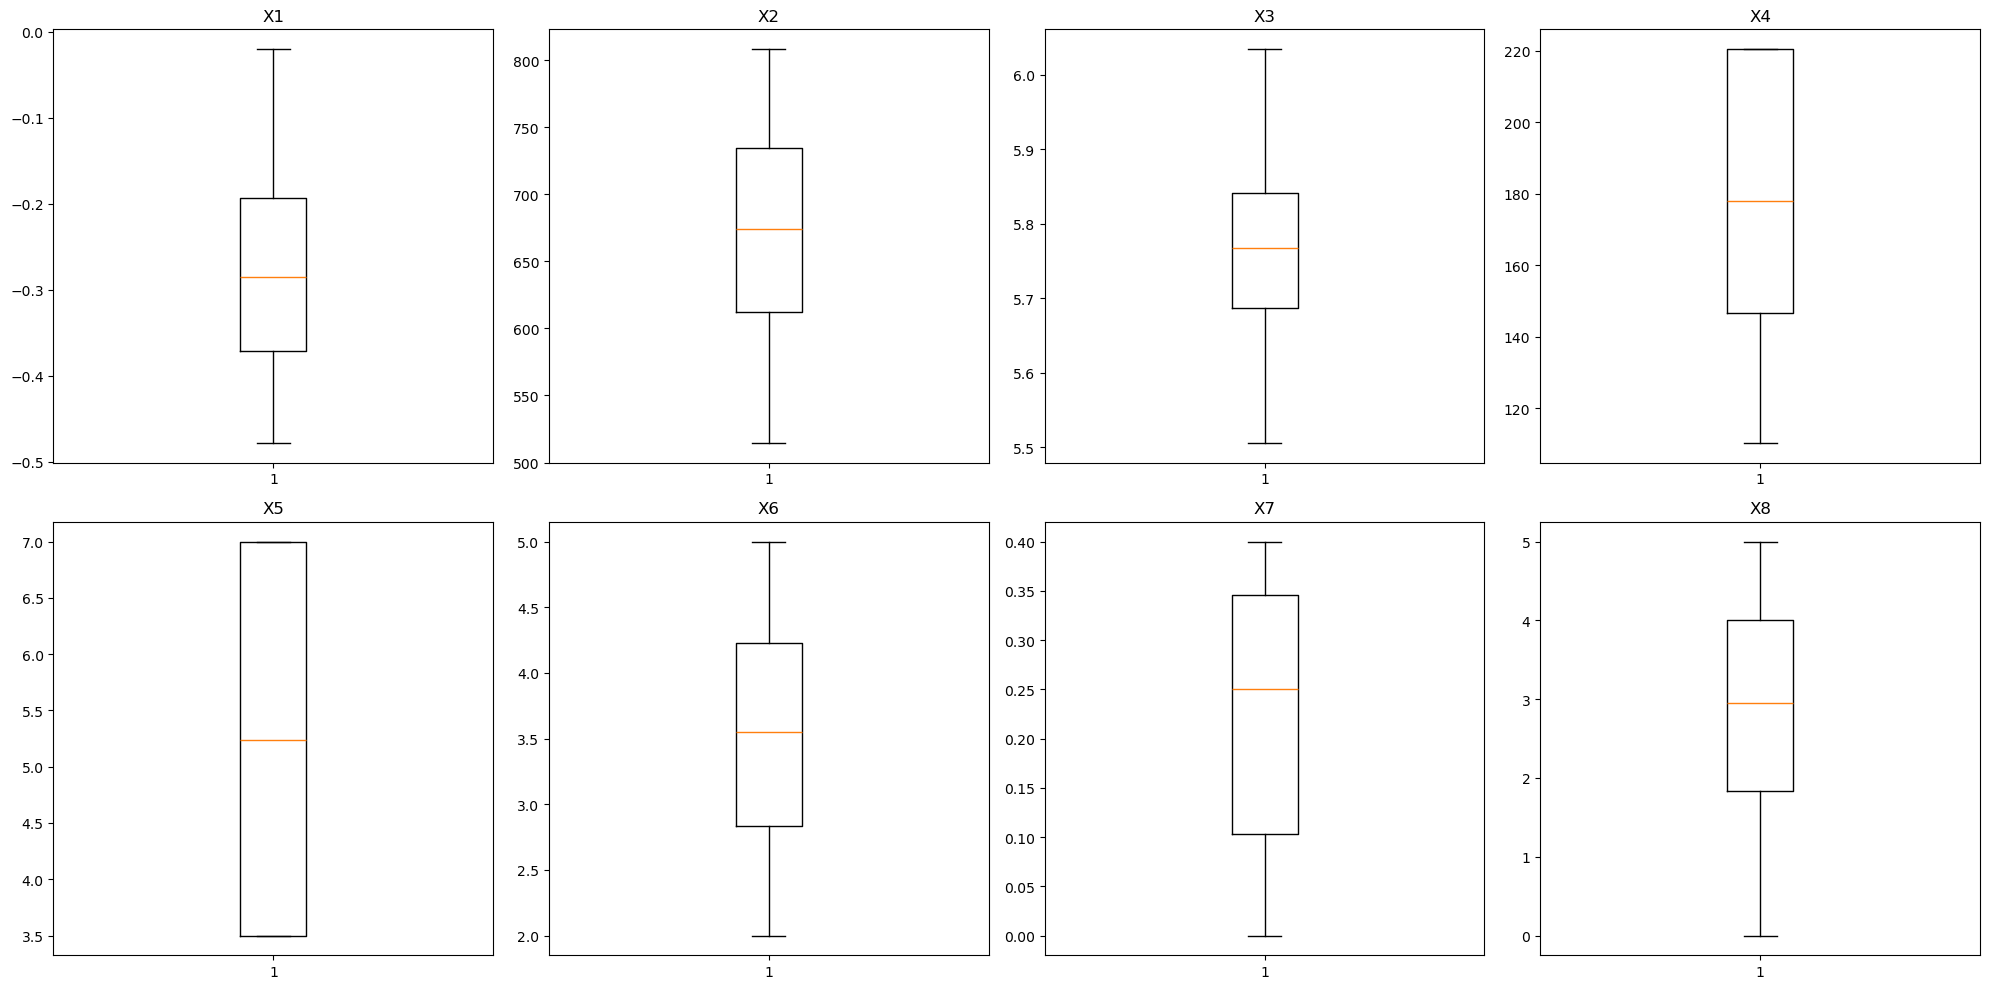

In [18]:
plt.figure(figsize=(20,10))

for i, col in enumerate(['X1','X2','X3','X4','X5','X6','X7','X8'], 1):
    plt.subplot(2,4,i)
    plt.boxplot(df_upsampled[col])
    plt.title(col)

plt.tight_layout()
plt.show()

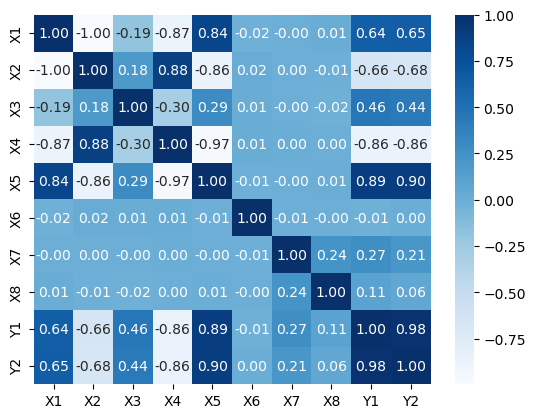

In [19]:
sns.heatmap(df_upsampled.corr(),annot=True,fmt=".2f",cmap='Blues')
plt.show()

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [20]:
df_upsampled=df_upsampled.drop(columns=['X2','X4'])

In [21]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [22]:
df_upsampled.shape

(2000, 8)

In [23]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [24]:
df_upsampled.columns

Index(['X1', 'X3', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [25]:
df_upsampled.to_csv('cleaned_dataset.csv',index=False)